<a href="https://colab.research.google.com/github/PedroReste/repository_for_studies/blob/main/superheroes_dataset/dc_superheroes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this notebook is for studies of Python and analysis types.

The dataset used is from [Kaggle](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-comic-characters-dataset), where you can find more informations from the original author of the dataset.

Some informartions about the dataset and it's variables:
- **page_id** >	The unique identifier for that characters page within the [DC wikia](https://dc.fandom.com/wiki/DC_Comics_Database).
- **name** >	The name of the character.
- **urlslug** >	The unique url within the wikia that takes you to the character.
- **ID** >	The identity status of the character (Secret Identity, Public identity).
- **ALIGN** >	If the character is Good, Bad or Neutral.
- **EYE**	> Eye color of the character.
-**HAIR**	> Hair color of the character.
- **SEX** >	Sex of the character.
- **GSM** >	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters).
- **ALIVE**	> If the character is alive or deceased.
- **APPEARANCES** >	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on).
- **FIRST APPEARANCE** >	The month and year of the character's first appearance in a comic book, if available.
- **YEAR** >	The year of the character's first appearance in a comic book, if available.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PedroReste/repository_for_studies/main/superheroes_dataset/dc-wikia-data.csv"
df = pd.read_csv(url)

In [72]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [73]:
df.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [74]:
#Checking how many NaN values of each column
print(df.notnull().sum())
print(f"The dataset has {len(df)} rows.")

page_id             6896
name                6896
urlslug             6896
ID                  4883
ALIGN               6295
EYE                 3268
HAIR                4622
SEX                 6771
GSM                   64
ALIVE               6893
APPEARANCES         6541
FIRST APPEARANCE    6827
YEAR                6827
dtype: int64
The dataset has 6896 rows.


****
Unfortunately, the column **GSM**, which is about characters from minorities, doesn't have some much rows for interesting analysis relates diversity in DC comic books.

In [75]:
df[df["GSM"].notnull() == True].head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
48,1704,John Constantine (New Earth),\/wiki\/John_Constantine_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Bisexual Characters,Living Characters,371.0,"1984, June",1984.0
65,8856,Renee Montoya (New Earth),\/wiki\/Renee_Montoya_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,308.0,"1992, March",1992.0
119,1862,Todd Rice (New Earth),\/wiki\/Todd_Rice_(New_Earth),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Homosexual Characters,Living Characters,208.0,"1983, September",1983.0
134,1658,Margaret Sawyer (New Earth),\/wiki\/Margaret_Sawyer_(New_Earth),Public Identity,NaN,Blue Eyes,NaN,Female Characters,Homosexual Characters,Living Characters,180.0,"1987, April",1987.0
173,1597,Hartley Rathaway (New Earth),\/wiki\/Hartley_Rathaway_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Male Characters,Homosexual Characters,Living Characters,160.0,"1959, May",1959.0


****

In [76]:
#Removing some rows without information, based on column YEAR and APPEARANCES
df.dropna(subset=["YEAR", "APPEARANCES"], inplace=True)

#Creating a column with only month information
df["MONTH"] = df["FIRST APPEARANCE"].str[6:]

#Converting the columns YEAR and APPEARANCES in "int"
df["YEAR"] = df["YEAR"].astype("int")
df["APPEARANCES"] = df["APPEARANCES"].astype("int")

#Removing some columns that not interesting for this analysis
df.drop(columns=["page_id", "urlslug", "ALIVE"], inplace= True)

In [77]:
#Checking again how many NaN values of each column
print(df.notnull().sum())
print(f"The dataset has {len(df)} rows.")

name                6481
ID                  4626
ALIGN               5923
EYE                 3100
HAIR                4412
SEX                 6368
GSM                   63
APPEARANCES         6481
FIRST APPEARANCE    6481
YEAR                6481
MONTH               6481
dtype: int64
The dataset has 6481 rows.


In [78]:
#Removing redundant words from the columns
df["ID"] = df["ID"].str.split()
df["ID"] = df["ID"].str[0]

df["ALIGN"] = df["ALIGN"].str.split()
df["ALIGN"] = df["ALIGN"].str[0]

df["EYE"] = df["EYE"].str.split()
df["EYE"] = df["EYE"].str[0]

df["HAIR"] = df["HAIR"].str.split()
df["HAIR"] = df["HAIR"].str[0]

df["SEX"] = df["SEX"].str.split()
df["SEX"] = df["SEX"].str[0]

In [79]:
#Viewing the table after the treaments
df.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH
0,Batman (Bruce Wayne),Secret,Good,Blue,Black,Male,NaN,3093,"1939, May",1939,May
1,Superman (Clark Kent),Secret,Good,Blue,Black,Male,NaN,2496,"1986, October",1986,October
2,Green Lantern (Hal Jordan),Secret,Good,Brown,Brown,Male,NaN,1565,"1959, October",1959,October
3,James Gordon (New Earth),Public,Good,Brown,White,Male,NaN,1316,"1987, February",1987,February
4,Richard Grayson (New Earth),Secret,Good,Blue,Black,Male,NaN,1237,"1940, April",1940,April


In [101]:
df.to_excel("base.xlsx")

After some treaments for to have a better data vizualization, we can to plot some simple charts to look our data

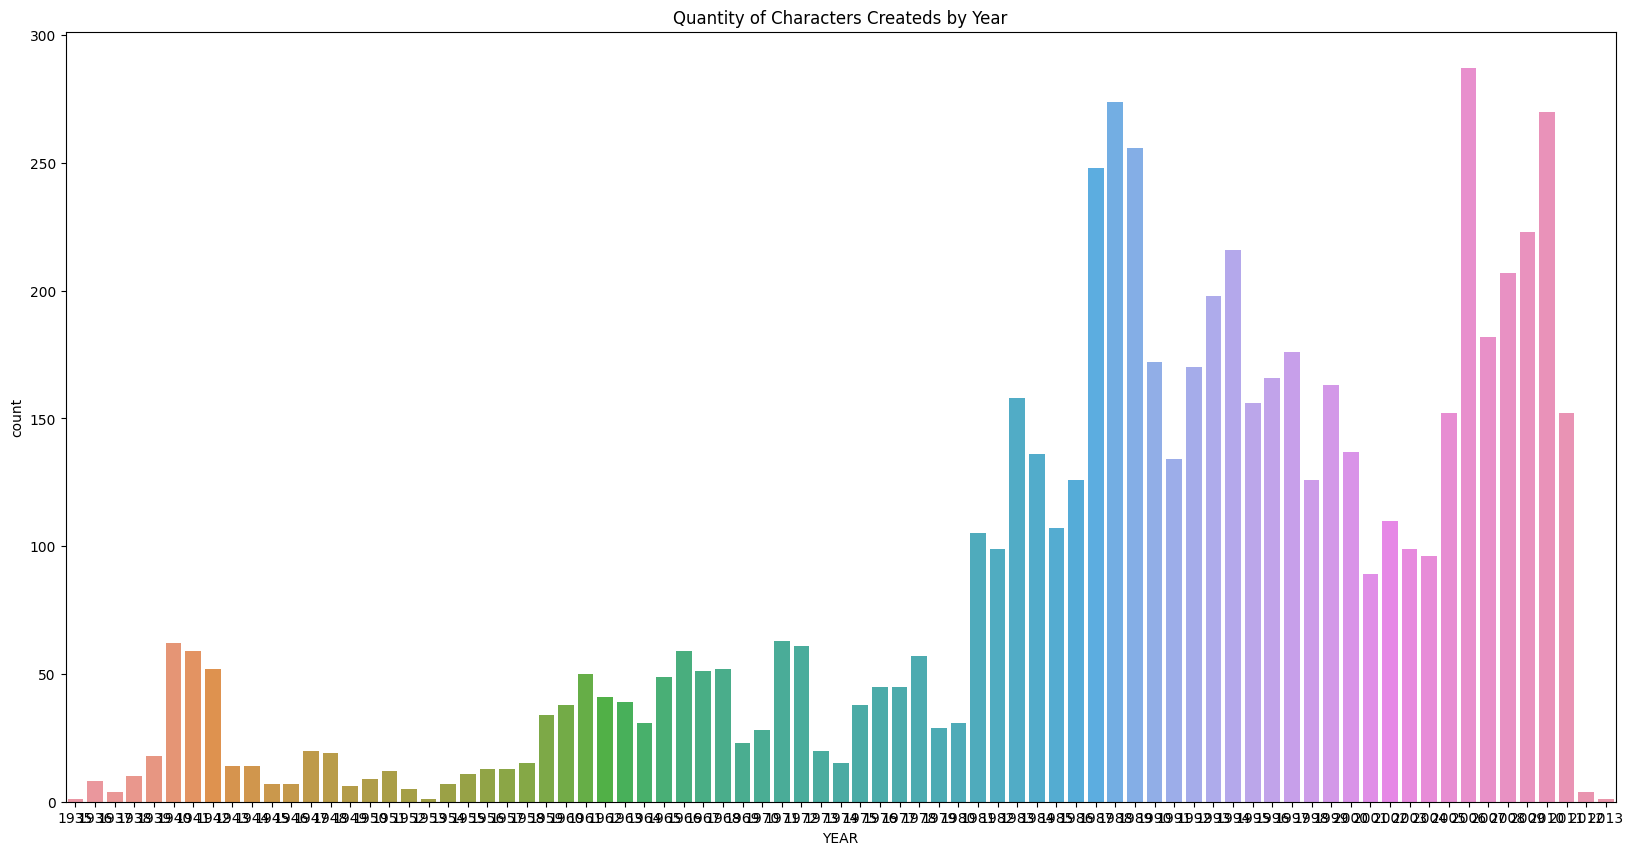

In [111]:
ax = plt.figure(figsize=(20,10))
ax = plt.title("Quantity of Characters Createds by Year")
ax = sns.countplot(x=df["YEAR"])
ax;

This chart looks good already, but the X axis is illegible, difficult to understand.

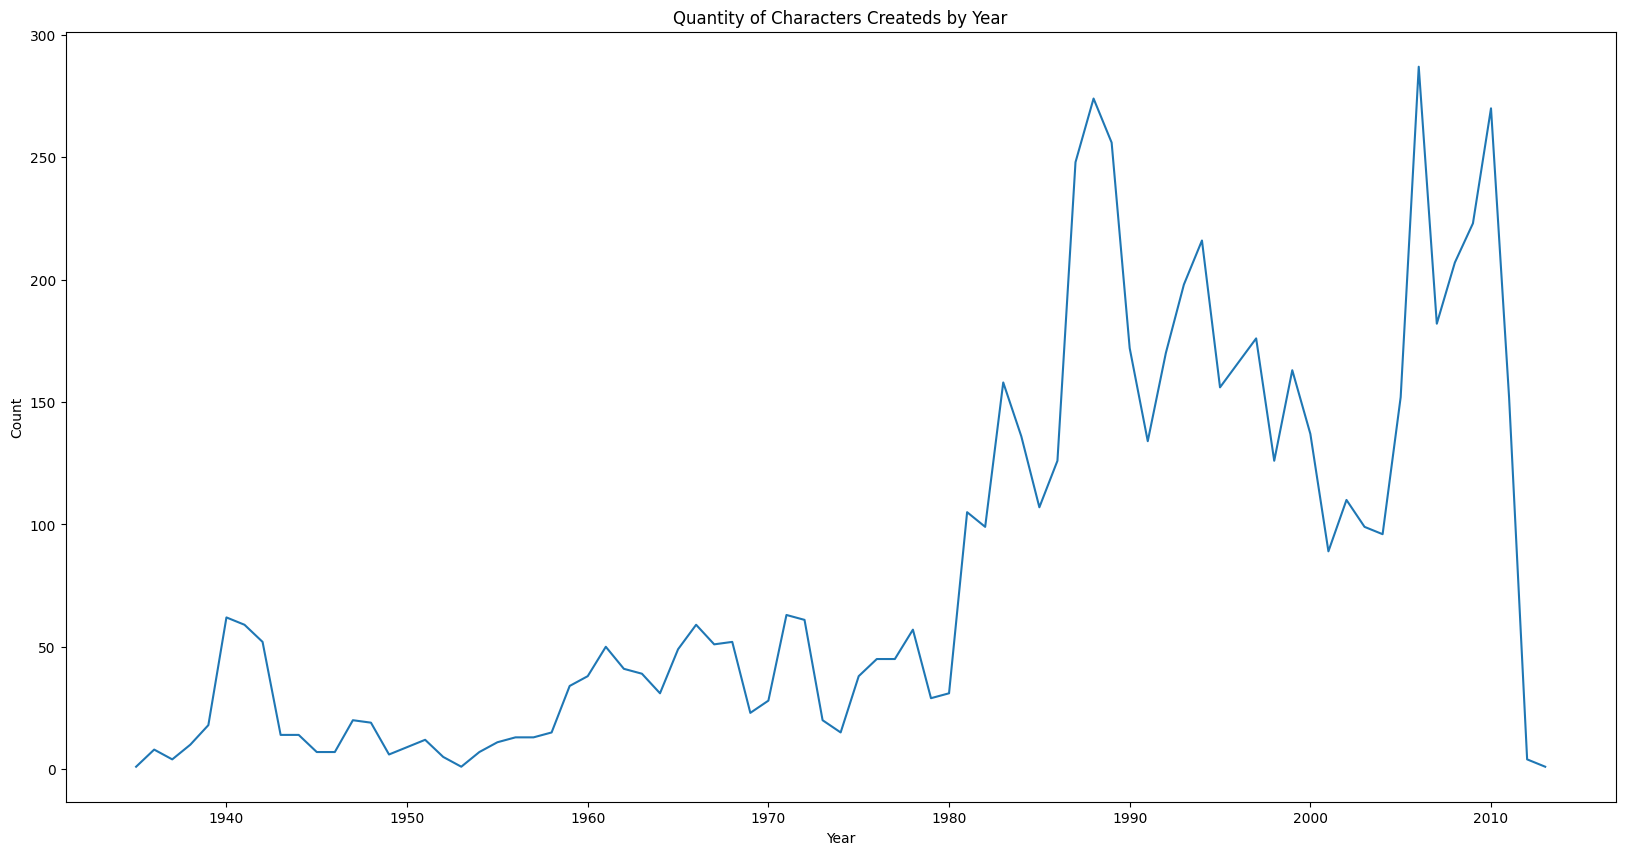

In [142]:
year = df["YEAR"].value_counts().sort_index().reset_index()
year.columns = ["Year", "Count"]

ax = plt.figure(figsize=(20,10))
ax = plt.title("Quantity of Characters Createds by Year")
ax = sns.lineplot(data=year, x="Year", y="Count")
ax;

The lineplot is almost the same the countplot, but the X axis is spaced by decade, easier to read.